## Problem Statement

#### To build a machine learning model that predicts whether a student will be placed based on academic performance, internships, projects, certifications, soft skills, and other relevant factors.

### Loading the data

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv("placementdata.csv")

In [64]:
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


### Data Preprocessing

In [65]:
df.shape

(10000, 12)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


#### Finding Missing Values

In [67]:
df.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

#### Checking for outliers

In [68]:
def outliers_percentage(df):
    outliers_dict = {}   
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1 
        lower_boundary = Q1 - (1.5 * IQR)
        upper_boundary = Q3 + (1.5 * IQR)
        outliers = df[(df[col] < lower_boundary) | (df[col] > upper_boundary)]
        outliers_dict[col] = (len(outliers) / len(df)) * 100
    return outliers_dict

In [69]:
outliers_percentage(df)

{'StudentID': 0.0,
 'CGPA': 0.0,
 'Internships': 44.58,
 'Projects': 0.0,
 'Workshops/Certifications': 0.0,
 'AptitudeTestScore': 0.0,
 'SoftSkillsRating': 0.0,
 'SSC_Marks': 0.0,
 'HSC_Marks': 0.0}

<function matplotlib.pyplot.show(close=None, block=None)>

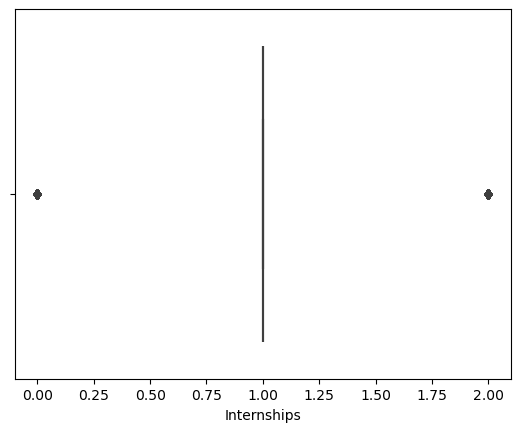

In [70]:
sns.boxplot(x=df['Internships'])
plt.show

#### Removing unwanted columns

In [71]:
df = df.drop("StudentID", axis=1)

In [72]:
df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


#### EDA

C:\Users\Anura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


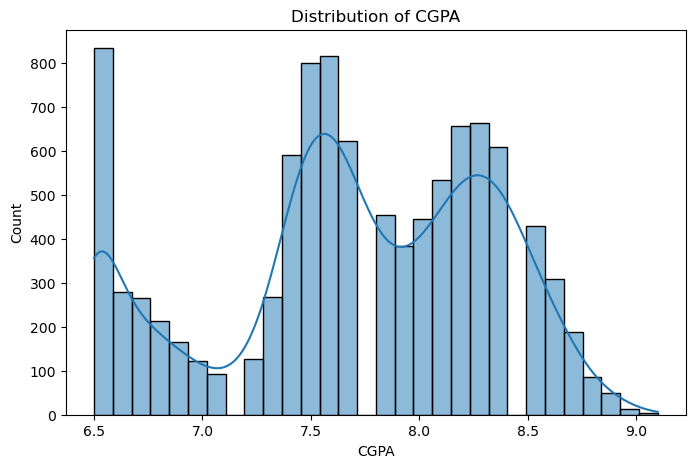

In [73]:
plt.figure(figsize=(8, 5))
sns.histplot(df["CGPA"], bins=30, kde=True)
plt.title("Distribution of CGPA")
plt.savefig("dist_of_CGPA.png")
plt.show()

**Key Observations**
- The histogram with KDE shows the overall distribution of students' CGPA.
- A significant number of students have CGPA between 7 and 8.5, which could indicate that this range is common among students.

C:\Users\Anura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


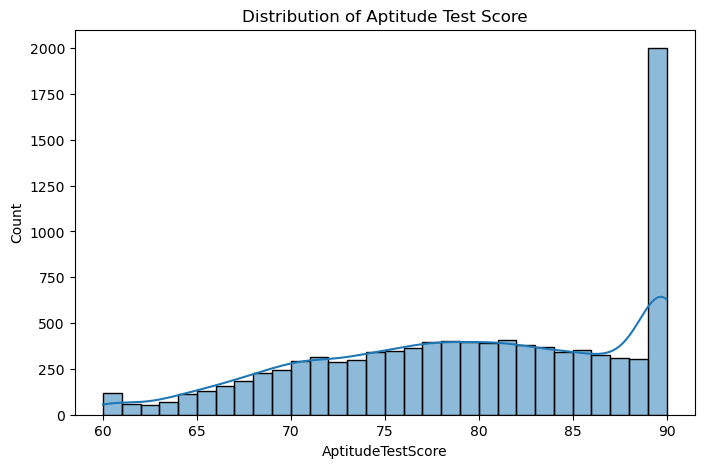

In [74]:
plt.figure(figsize=(8, 5))
sns.histplot(df["AptitudeTestScore"], bins=30, kde=True)
plt.title("Distribution of Aptitude Test Score")
plt.savefig("dist_of_AptitudeTestScore.png")
plt.show()

**Key Observations**
- The distribution appears right-skewed, with a peak at around 90, indicating many students scored 90.
- There is a gradual increase in frequency between 60-85, followed by a sharp spike at 90.

C:\Users\Anura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


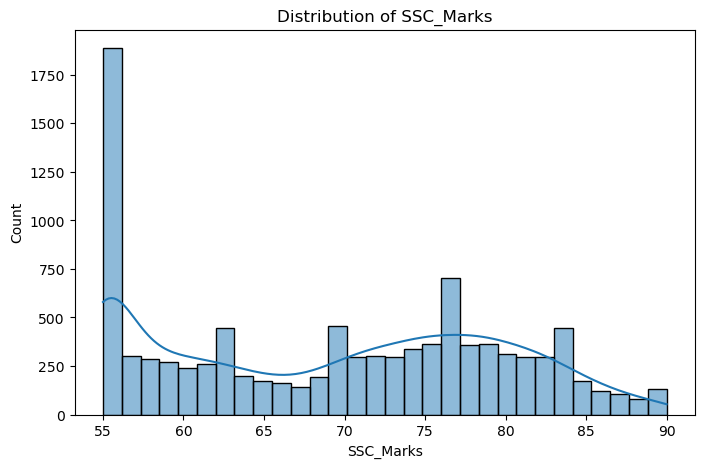

In [75]:
plt.figure(figsize=(8, 5))
sns.histplot(df["SSC_Marks"], bins=30, kde=True)
plt.title("Distribution of SSC_Marks")
plt.savefig("dist_of_SSC_Marks.png")
plt.show()

**Key Observations**
- This distribution is somewhat bimodal, with a peak near 55-60 and another around 75.
- The high number of students scoring near 55 suggests a higer number of lower-performing students.

C:\Users\Anura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


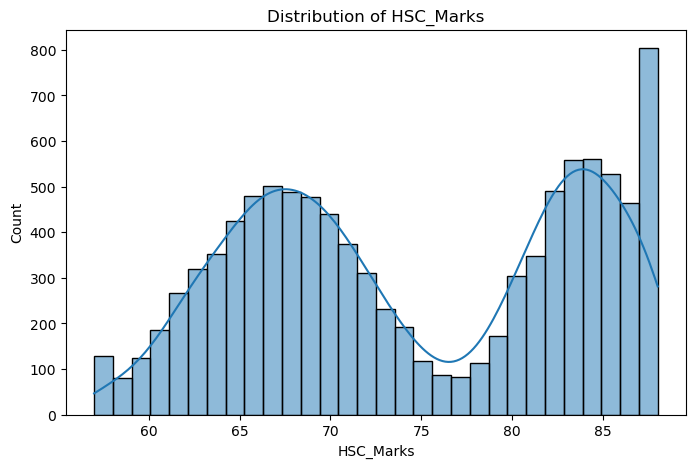

In [76]:
plt.figure(figsize=(8, 5))
sns.histplot(df["HSC_Marks"], bins=30, kde=True)
plt.title("Distribution of HSC_Marks")
plt.savefig("dist_of_HSC_Marks.png")
plt.show()

**Key Observations**
- The distribution is bimodal, with peaks around 65-70 and another around 80-85.
- This suggests that there might be two distinct groups of students, one group scoring in the mid-60s and another in the 80s.

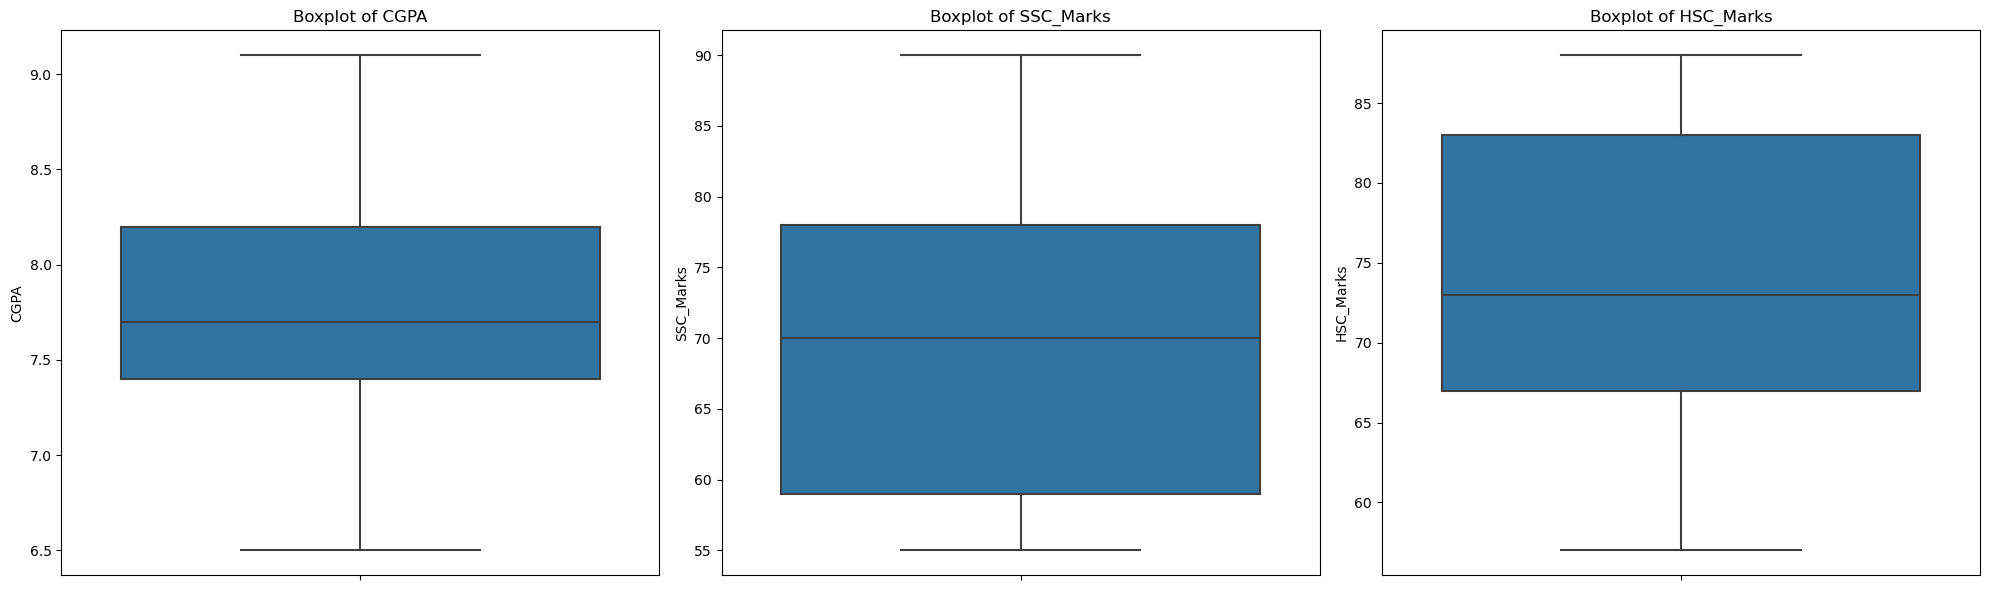

In [77]:
num_features = ["CGPA","SSC_Marks","HSC_Marks"]
count = 0
plt.figure(figsize=(20, 6))
for feature in num_features:
    if df[feature].dtype in ["int64","float64"]:
        count +=1
        plt.subplot(1,3,count)
        sns.boxplot(data = df, y = feature)
        plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.savefig("boxplots.png")
plt.show()

**Key Observations**
- Higher CGPA and better marks in SSC & HSC might contribute to a higher probability of placement.

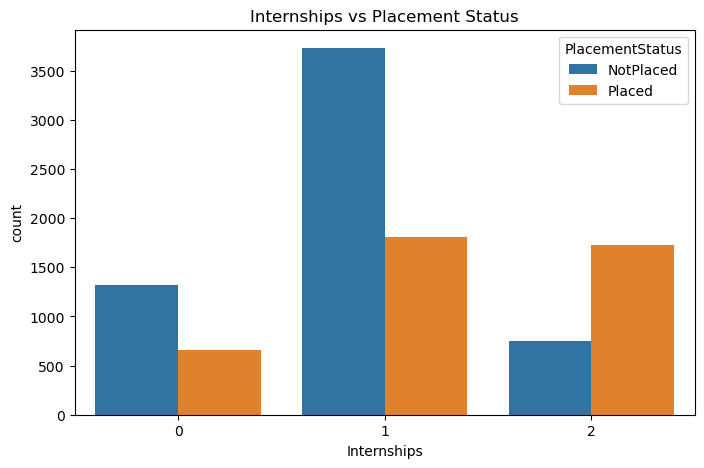

In [78]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Internships"], hue=df["PlacementStatus"])
plt.title("Internships vs Placement Status")
plt.savefig("Internships vs PlacementStatus.png")
plt.show()

**Key Observations**
- The plot show that having at least one internship increases the probability of being placed.
- Students with no internships have a higher chance of not being placed.

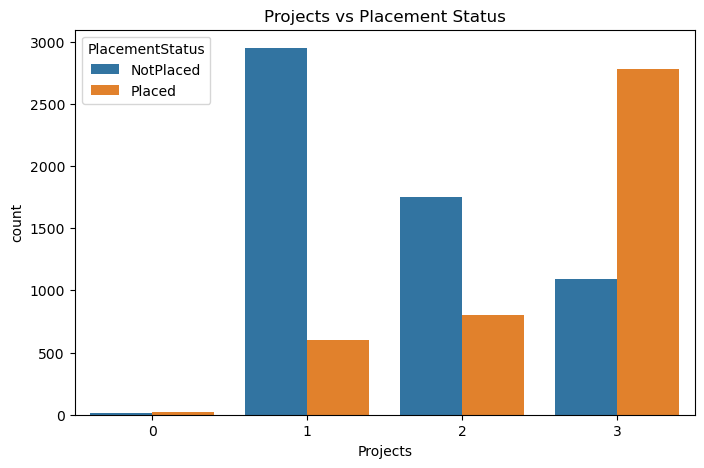

In [79]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Projects"], hue=df["PlacementStatus"])
plt.title("Projects vs Placement Status")
plt.savefig("Projects vs PlacementStatus.png")
plt.show()

**Key Observations**
- There is a clear relation between the number of projects and placement status.
- Students who have done three projects have the highest placement rate.

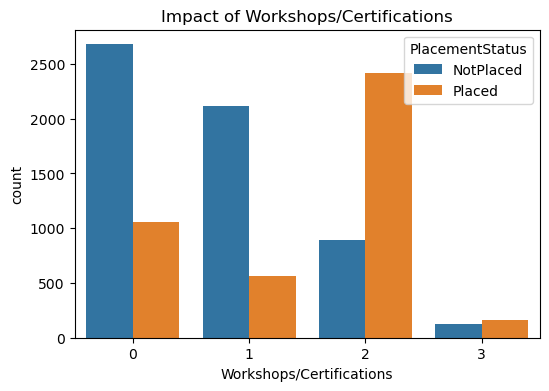

In [80]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Workshops/Certifications"], hue=df["PlacementStatus"])
plt.title("Impact of Workshops/Certifications")
plt.savefig("Impact_of_WC.png")
plt.show()

**Key Observations**
- Students with 2 or more workshops/certifications have a higher chance of being placed.
- The majority of students with 0 or 1 certification remain unplaced.

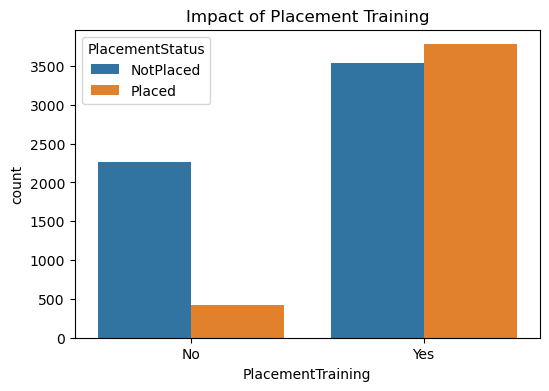

In [81]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["PlacementTraining"], hue=df["PlacementStatus"])
plt.title("Impact of Placement Training")
plt.savefig("Impact_of_PlacementTraining.png")
plt.show()

**Key Observations**
- This bar plot indicates that students who underwent placement training had a much higher placement rate than those who did not.

In [82]:
# Bin Aptitude Test Score
bins_aptitude = [60, 70, 80, 90, 100]
labels_aptitude = ["60-70", "70-80", "80-90", "90-100"]
df["Aptitude_Bin"] = pd.cut(df["AptitudeTestScore"], bins=bins_aptitude, labels=labels_aptitude, include_lowest=True)

# Bin Soft Skills Rating
bins_softskills = [3.5, 4.0, 4.5, 5.0]
labels_softskills = ["3.5-4.0", "4.0-4.5", "4.5-5.0"]
df["SoftSkills_Bin"] = pd.cut(df["SoftSkillsRating"], bins=bins_softskills, labels=labels_softskills, include_lowest=True)

C:\Users\Anura\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Anura\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


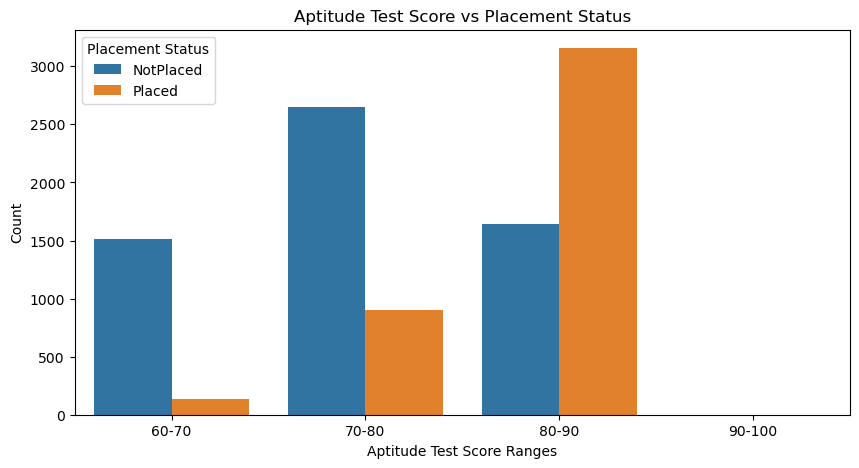

In [83]:
# Plot Aptitude Score Bins vs Placement Status
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Aptitude_Bin", hue="PlacementStatus")
plt.title("Aptitude Test Score vs Placement Status")
plt.xlabel("Aptitude Test Score Ranges")
plt.ylabel("Count")
plt.legend(title="Placement Status")
plt.savefig("Aptitude_vs_PlacementStatus.png")
plt.show()

C:\Users\Anura\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Anura\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


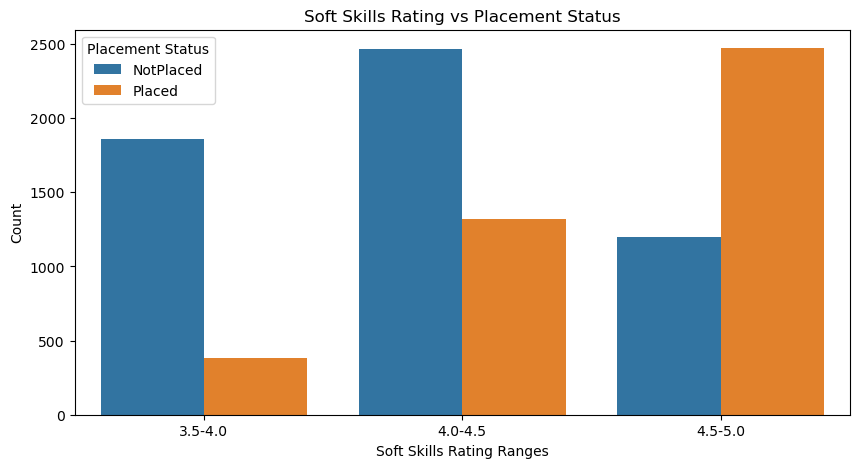

In [84]:
# Plot Soft Skills Rating Bins vs Placement Status
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="SoftSkills_Bin", hue="PlacementStatus")
plt.title("Soft Skills Rating vs Placement Status")
plt.xlabel("Soft Skills Rating Ranges")
plt.ylabel("Count")
plt.legend(title="Placement Status")
plt.savefig("SoftSkillsRating_vs_PlacementStatus.png")
plt.show()

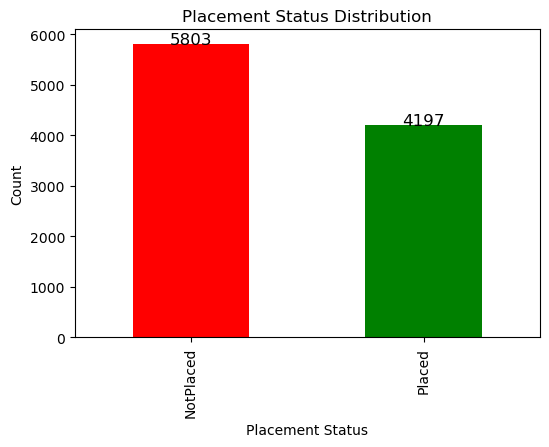

In [85]:
plt.figure(figsize=(6, 4))
ax = df["PlacementStatus"].value_counts().plot(kind="bar", color=["red", "green"])

for i, count in enumerate(df["PlacementStatus"].value_counts()):
    ax.text(i, count + 2, str(count), ha="center", fontsize=12)

plt.title("Placement Status Distribution")
plt.xlabel("Placement Status")
plt.ylabel("Count")
plt.savefig("placement_status_dist.png")
plt.show()

**Key Observations**
- The bar chart indicates that the number of students not placed is higher that those of placed.

#### Identifying Nominal and Ordinal Columns for Encoding & Scaling of data

In [86]:
df.nunique()

CGPA                         27
Internships                   3
Projects                      4
Workshops/Certifications      4
AptitudeTestScore            31
SoftSkillsRating             19
ExtracurricularActivities     2
PlacementTraining             2
SSC_Marks                    36
HSC_Marks                    32
PlacementStatus               2
Aptitude_Bin                  3
SoftSkills_Bin                3
dtype: int64

#### Encoding categorical features

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
label_encoder = LabelEncoder()

In [89]:
df["PlacementStatus"] = label_encoder.fit_transform(df["PlacementStatus"])
df["ExtracurricularActivities"] = label_encoder.fit_transform(df["ExtracurricularActivities"])
df["PlacementTraining"] = label_encoder.fit_transform(df["PlacementTraining"])

In [90]:
df = df.drop(columns = ['Aptitude_Bin','SoftSkills_Bin'])

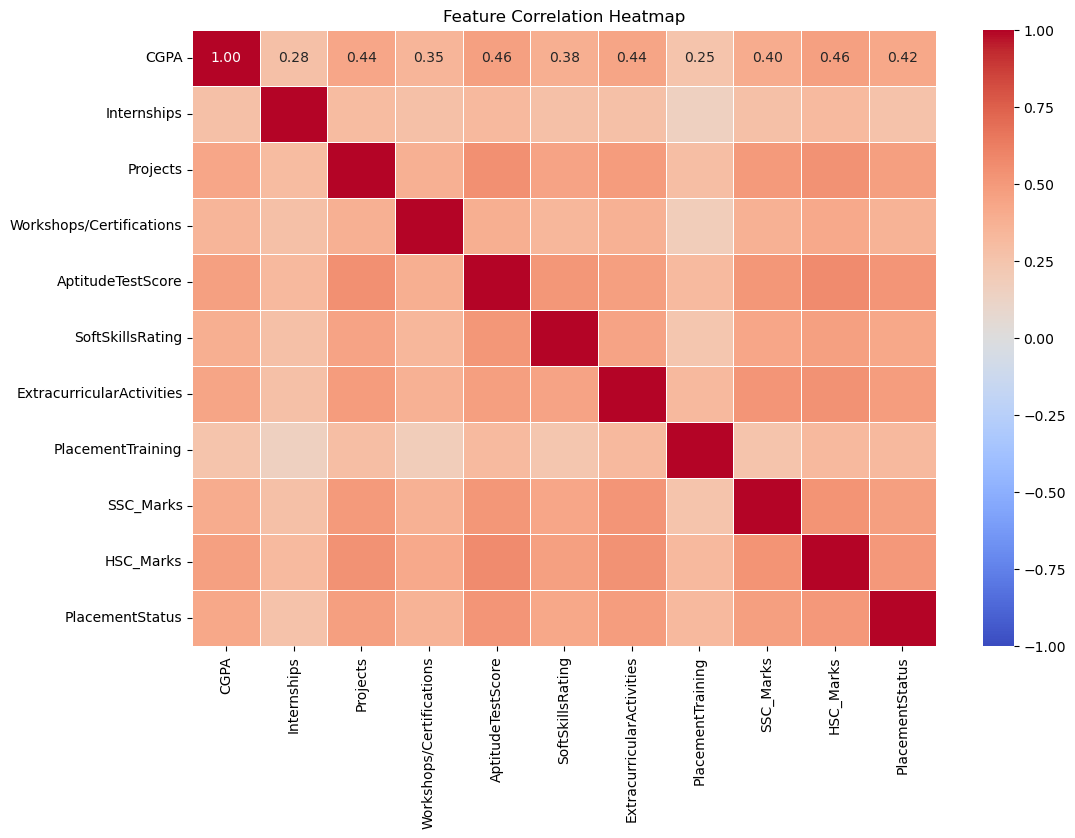

In [91]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

#### Splitting Input and Output Variables

In [92]:
X = df.drop('PlacementStatus', axis = 1)

In [93]:
y = df['PlacementStatus']

#### Splitting into Train and Test

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scaling numerical features

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
sc = StandardScaler()

In [98]:
X_train_scaled = sc.fit_transform(X_train)

In [99]:
X_test_scaled = sc.transform(X_test)

#### Polynomial Features

In [100]:
from sklearn.preprocessing import PolynomialFeatures

In [101]:
pf = PolynomialFeatures(degree=2)

In [102]:
X_train_poly = pf.fit_transform(X_train_scaled)

In [103]:
X_test_poly = pf.transform(X_test_scaled)

### Part-2 Training a ML Model

#### Training

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
lor_model = LogisticRegression()

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['liblinear', 'lbfgs', 'saga']}

In [108]:
grid_search = GridSearchCV(lor_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [109]:
grid_search.fit(X_train_poly, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='accuracy')

In [110]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.01, 'solver': 'lbfgs'}


In [111]:
best_log_reg = grid_search.best_estimator_

#### Prediction

In [112]:
y_pred = best_log_reg.predict(X_test_poly)

#### Evaluation

In [113]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [114]:
test_score = accuracy_score(y_test, y_pred)

In [115]:
test_score

0.795

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1172
           1       0.76      0.74      0.75       828

    accuracy                           0.80      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.80      0.79      2000



In [117]:
cm_test = confusion_matrix(y_test,y_pred)

##### Plotting confusion matrix

In [118]:
from mlxtend.plotting import plot_confusion_matrix

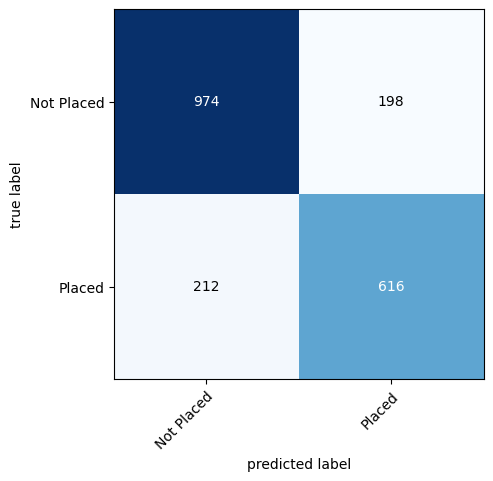

In [119]:
plot_confusion_matrix(cm_test,class_names=["Not Placed","Placed"])
plt.savefig("conf_matrix.png")
plt.show()

In [120]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, best_log_reg.predict_proba(X_test_poly)[:, 1])

0.8766848444378493

### Saving the Model

In [121]:
lor_model.sc = sc
lor_model.pf = pf

In [122]:
import joblib

In [123]:
joblib.dump(lor_model,"placement_prediction.pkl")

['placement_prediction.pkl']